In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

In [2]:
df=pd.read_csv("F:\Work\diease detection\ckd\diease detection\chronic-1.csv")

In [3]:
df=df.replace('?',np.nan)

In [4]:
#data=df[['sg','al','su','bgr','bu','sc','pot','hemo','pcv','rbcc','rbc','htn','dm','appet','Label']].copy()

In [5]:
#df1=df.drop(columns=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'])

In [6]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,Label
0,1,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,294,50,NaN,1.02,0,0,normal,normal,notpresent,notpresent,...,48,4700,5.4,no,no,no,good,no,no,notckd
3,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,258,38,60,1.02,0,0,normal,normal,notpresent,notpresent,...,46,9100,5.8,no,no,no,good,no,no,notckd
396,245,64,90,1.015,3,2,NaN,abnormal,present,notpresent,...,40,9800,4.6,yes,yes,no,good,no,yes,ckd
397,246,48,100,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,19,7200,2.6,yes,no,yes,poor,no,no,ckd
398,247,48,110,1.015,3,0,abnormal,normal,present,notpresent,...,26,5000,2.5,yes,no,yes,good,no,yes,ckd


In [7]:
df1=df.drop(columns=['id','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','Label'])

In [8]:
df1

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48,80,1.02,1,0,121,36,1.2,NaN,NaN,15.4,44,7800,5.2
1,7,50,1.02,4,0,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN
2,50,NaN,1.02,0,0,92,19,1.2,150,4.8,14.9,48,4700,5.4
3,62,80,1.01,2,3,423,53,1.8,NaN,NaN,9.6,31,7500,NaN
4,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38,60,1.02,0,0,91,36,0.7,135,3.7,14,46,9100,5.8
396,64,90,1.015,3,2,463,64,2.8,135,4.1,12.2,40,9800,4.6
397,48,100,NaN,NaN,NaN,103,79,5.3,135,6.3,6.3,19,7200,2.6
398,48,110,1.015,3,0,106,215,15.2,120,5.7,8.6,26,5000,2.5


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [11]:
df2=imp.fit_transform(df1)

[IterativeImputer] Completing matrix with shape (400, 14)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.03
[IterativeImputer] Change: 5240.189691991134, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.04
[IterativeImputer] Change: 653.8287601777163, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.05
[IterativeImputer] Change: 363.81807218956897, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.06
[IterativeImputer] Change: 167.76934918568335, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.08
[IterativeImputer] Change: 89.20450996249278, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.09
[IterativeImputer] Change: 63.279321770029455, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.09
[IterativeImputer] 

[IterativeImputer] Ending imputation round 58/100, elapsed time 0.76
[IterativeImputer] Change: 0.0008207022629435068, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 59/100, elapsed time 0.79
[IterativeImputer] Change: 0.0006731537210475924, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 60/100, elapsed time 0.80
[IterativeImputer] Change: 0.0005521678510792549, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 61/100, elapsed time 0.81
[IterativeImputer] Change: 0.00045293788699030113, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 62/100, elapsed time 0.83
[IterativeImputer] Change: 0.00037155545134415213, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 63/100, elapsed time 0.83
[IterativeImputer] Change: 0.0003048108701112495, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 64/100, elapsed time 0.85
[IterativeImputer] Change: 0.000250064577189235

In [12]:
dl1=pd.DataFrame(df2,columns=('age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'))

In [13]:
dl1.head(20)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,80.000000,1.020,1.0,0.0,121.000000,36.0,1.2,138.825303,3.818908,15.4,44.0,7800.000000,5.200000
1,7.0,50.000000,1.020,4.0,0.0,152.129316,18.0,0.8,130.721286,3.892231,11.3,38.0,6000.000000,4.684685
2,50.0,74.867666,1.020,0.0,0.0,92.000000,19.0,1.2,150.000000,4.800000,14.9,48.0,4700.000000,5.400000
3,62.0,80.000000,1.010,2.0,3.0,423.000000,53.0,1.8,132.747426,4.966038,9.6,31.0,7500.000000,3.737033
4,48.0,70.000000,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.000000,3.900000
5,30.0,80.000000,1.020,0.0,0.0,89.000000,42.0,0.5,139.000000,5.000000,16.7,52.0,10200.000000,5.000000
6,51.0,80.000000,1.010,2.0,0.0,106.000000,26.0,1.4,133.647830,3.406368,11.6,35.0,7300.000000,4.600000
7,60.0,90.000000,1.015,3.0,0.0,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.000000,4.400000
8,47.0,80.000000,1.025,0.0,0.0,124.000000,44.0,1.0,140.000000,4.900000,14.9,41.0,7000.000000,5.700000
9,75.0,60.000000,1.020,0.0,0.0,110.000000,50.0,0.7,135.000000,5.000000,14.3,40.0,8300.000000,5.800000


In [14]:
df3=df.drop(columns=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','Label'])

In [15]:
df3

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
3,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
4,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,NaN,abnormal,present,notpresent,yes,yes,no,good,no,yes
397,NaN,NaN,notpresent,notpresent,yes,no,yes,poor,no,no
398,abnormal,normal,present,notpresent,yes,no,yes,good,no,yes


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant',fill_value='Missing')
df4=imputer.fit_transform(df3)

In [17]:
dl2=pd.DataFrame(df4,columns=('rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'))

In [18]:
dl2.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,Missing,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,Missing,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
3,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
4,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes


In [19]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder()

In [20]:
dl3=ordi.fit_transform(dl2)

In [21]:
dl4=pd.DataFrame(dl3,columns=('rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'))

In [22]:
dl4

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
1,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
395,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
396,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
397,0.0,0.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0
398,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0


In [23]:
x=pd.concat([dl1,dl4],axis=1)

In [24]:
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.000000,1.020000,1.000000,0.000000,121.000000,36.0,1.2,138.825303,3.818908,...,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
1,7.0,50.000000,1.020000,4.000000,0.000000,152.129316,18.0,0.8,130.721286,3.892231,...,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,50.0,74.867666,1.020000,0.000000,0.000000,92.000000,19.0,1.2,150.000000,4.800000,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,62.0,80.000000,1.010000,2.000000,3.000000,423.000000,53.0,1.8,132.747426,4.966038,...,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0
4,48.0,70.000000,1.005000,4.000000,0.000000,117.000000,56.0,3.8,111.000000,2.500000,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38.0,60.000000,1.020000,0.000000,0.000000,91.000000,36.0,0.7,135.000000,3.700000,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
396,64.0,90.000000,1.015000,3.000000,2.000000,463.000000,64.0,2.8,135.000000,4.100000,...,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
397,48.0,100.000000,1.010276,2.182839,0.046629,103.000000,79.0,5.3,135.000000,6.300000,...,0.0,0.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0
398,48.0,110.000000,1.015000,3.000000,0.000000,106.000000,215.0,15.2,120.000000,5.700000,...,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0


In [25]:
y=df['Label']

In [26]:
a=pd.concat([x,y],axis=1)

In [27]:
a

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,Label
0,48.0,80.000000,1.020000,1.000000,0.000000,121.000000,36.0,1.2,138.825303,3.818908,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,ckd
1,7.0,50.000000,1.020000,4.000000,0.000000,152.129316,18.0,0.8,130.721286,3.892231,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,ckd
2,50.0,74.867666,1.020000,0.000000,0.000000,92.000000,19.0,1.2,150.000000,4.800000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,notckd
3,62.0,80.000000,1.010000,2.000000,3.000000,423.000000,53.0,1.8,132.747426,4.966038,...,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,ckd
4,48.0,70.000000,1.005000,4.000000,0.000000,117.000000,56.0,3.8,111.000000,2.500000,...,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38.0,60.000000,1.020000,0.000000,0.000000,91.000000,36.0,0.7,135.000000,3.700000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,notckd
396,64.0,90.000000,1.015000,3.000000,2.000000,463.000000,64.0,2.8,135.000000,4.100000,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,ckd
397,48.0,100.000000,1.010276,2.182839,0.046629,103.000000,79.0,5.3,135.000000,6.300000,...,0.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,ckd
398,48.0,110.000000,1.015000,3.000000,0.000000,106.000000,215.0,15.2,120.000000,5.700000,...,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,ckd


In [28]:
#a=a.sort_values(['bu'],ascending=False)
#a.reset_index(drop=True,inplace=True)

In [29]:
#a.tail(40)

In [30]:
Label={'notckd':0,'ckd':1}
a['Label']=a['Label'].map(Label)

In [31]:
a.head(20)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,Label
0,48.0,80.000000,1.020,1.0,0.0,121.000000,36.0,1.2,138.825303,3.818908,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1
1,7.0,50.000000,1.020,4.0,0.0,152.129316,18.0,0.8,130.721286,3.892231,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1
2,50.0,74.867666,1.020,0.0,0.0,92.000000,19.0,1.2,150.000000,4.800000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0
3,62.0,80.000000,1.010,2.0,3.0,423.000000,53.0,1.8,132.747426,4.966038,...,2.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1
4,48.0,70.000000,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,1
5,30.0,80.000000,1.020,0.0,0.0,89.000000,42.0,0.5,139.000000,5.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0
6,51.0,80.000000,1.010,2.0,0.0,106.000000,26.0,1.4,133.647830,3.406368,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1
7,60.0,90.000000,1.015,3.0,0.0,74.000000,25.0,1.1,142.000000,3.200000,...,0.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1
8,47.0,80.000000,1.025,0.0,0.0,124.000000,44.0,1.0,140.000000,4.900000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0
9,75.0,60.000000,1.020,0.0,0.0,110.000000,50.0,0.7,135.000000,5.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0


In [32]:
u=a.iloc[:,:-1]
v=a['Label']

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
smote=SMOTE()
sm = SVMSMOTE()
x_train_resample,y_train_resample=sm.fit_resample(u,v) 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
k=scaler.fit_transform(x_train_resample)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(k,y_train_resample,test_size=0.2, random_state=0)

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
fold=ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
fold1=KFold(5)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [37]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [61]:
svm=SVC(C=10,kernel='rbf',gamma=0.1,probability=True)
knn=KNeighborsClassifier(n_neighbors=3)
rf=RandomForestClassifier(n_estimators=300,max_features='auto',bootstrap=True,
                          min_samples_split=6,min_samples_leaf=2,max_depth=None,random_state=0)
qda = QuadraticDiscriminantAnalysis()
tree=DecisionTreeClassifier(criterion='entropy',min_samples_split=6,random_state=0,max_depth=None)
tree1=DecisionTreeClassifier(criterion='entropy',min_samples_split=6,random_state=0,max_depth=8)
estimators1=[('svc',svm),('knn',knn)]
sc=StackingClassifier(estimators=estimators1,final_estimator=rf)
estimators=[('svc',svm),('knn',knn),('rf',rf),('qda',qda),('sc',sc)]

voting=VotingClassifier(estimators=estimators,voting='soft')
bag=BaggingClassifier(
    base_estimator=tree,
    n_estimators=500,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=0
    )
ada= AdaBoostClassifier(
      base_estimator=tree1,n_estimators=500,algorithm='SAMME', 
      random_state=0
      )
gdb=GradientBoostingClassifier(n_estimators=400,max_depth=8,learning_rate=0.01,min_samples_leaf=8)
lgb=LGBMClassifier(n_estimators=400,max_depth=5,learning_rate=0.1,min_child_weight=1)
xgb=XGBClassifier(n_estimators=400,max_depth=2,learning_rate=0.05,min_child_weight=3)

In [39]:
labels=['svm','knn','tree','rf','qda','voting','bag','ada','gdb','xgb','lgb','sc']

In [63]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    results_svm=cross_val_score(clf,x_train,y_train,cv=fold,scoring='accuracy')
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    print("%0.4faccuracy with a standard deviation of %0.4f" % (results_svm.mean(), results_svm.std()),label)

Time consumed for training: 0.182 seconds
1.0000accuracy with a standard deviation of 0.0000 svm
Time consumed for training: 0.019 seconds
1.0000accuracy with a standard deviation of 0.0000 knn
Time consumed for training: 0.017 seconds
0.9850accuracy with a standard deviation of 0.0200 tree
Time consumed for training: 2.411 seconds
0.9950accuracy with a standard deviation of 0.0100 rf
Time consumed for training: 0.014 seconds
0.9950accuracy with a standard deviation of 0.0100 qda


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are coll

Time consumed for training: 5.336 seconds
1.0000accuracy with a standard deviation of 0.0000 voting
Time consumed for training: 2.473 seconds
0.9850accuracy with a standard deviation of 0.0122 bag
Time consumed for training: 0.040 seconds
0.9850accuracy with a standard deviation of 0.0122 ada
Time consumed for training: 5.043 seconds
0.9900accuracy with a standard deviation of 0.0122 gdb
[09:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: Use

[09:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time consumed for training: 0.449 seconds
0.9900accuracy with a standard deviation of 0.0122 xgb
Time consumed for training: 0.119 seconds
0.9950accuracy with a standard deviation of 0.0100 lgb
Time consumed for training: 2.546 seconds
1.0000accuracy with a standard deviation of 0.0000 sc


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score 

In [64]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    clf.fit(x_train,y_train)
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred),label)
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))
        

Time consumed for training: 0.028 seconds
1.0 svm
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.000 seconds
0.99 knn
[[45  0]
 [ 1 54]]
1.0
0.9818181818181818
0.9908256880733944
0.990909090909091
Time consumed for training: 0.002 seconds
0.95 tree
[[42  3]
 [ 2 53]]
0.9464285714285714
0.9636363636363636
0.9549549549549549
0.9484848484848485
Time consumed for training: 0.511 seconds
0.98 rf
[[44  1]
 [ 1 54]]
0.9818181818181818
0.9818181818181818
0.9818181818181818
0.9797979797979798
Time consumed for training: 0.001 seconds
0.99 qda
[[44  1]
 [ 0 55]]
0.9821428571428571
1.0
0.9909909909909909
0.9888888888888888


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time consumed for training: 1.094 seconds
1.0 voting
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.426 seconds
0.97 bag
[[43  2]
 [ 1 54]]
0.9642857142857143
0.9818181818181818
0.972972972972973
0.9686868686868688
Time consumed for training: 0.008 seconds
0.99 ada
[[45  0]
 [ 1 54]]
1.0
0.9818181818181818
0.9908256880733944
0.990909090909091
Time consumed for training: 1.164 seconds
0.97 gdb
[[43  2]
 [ 1 54]]
0.9642857142857143
0.9818181818181818
0.972972972972973
0.9686868686868688
[09:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time consumed for training: 0.101 seconds
0.99 xgb
[[44  1]
 [ 0 55]]
0.9821428571428571
1.0
0.9909909909909909
0.9888888888888888
Time consumed for training: 0.029 seconds
0.99 lgb


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Time consumed for training: 0.574 seconds
1.0 sc
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0


In [43]:
from mlxtend.evaluate import combined_ftest_5x2cv

In [44]:
f, p = combined_ftest_5x2cv(estimator1=xgb,
                            estimator2=lgb,
                            X=k, y=y_train_resample,
                            random_seed=1)

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [45]:
print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 1.000
p value: 0.535


# Random Forest

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   30.3s finished


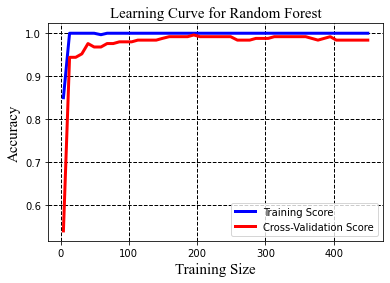

In [46]:
train_sizes,train_scores,test_scores=learning_curve(rf, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Random Forest', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("random.jpg",dpi=300)
plt.show()

# Voting

In [1]:
train_sizes,train_scores,test_scores=learning_curve(voting, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Voting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("voting.jpg",dpi=300)
plt.show()

NameError: name 'learning_curve' is not defined

# Bagging

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.4min finished


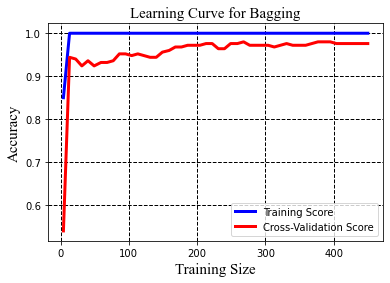

In [48]:
train_sizes,train_scores,test_scores=learning_curve(bag, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Bagging', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig('bagging.jpg',dpi=300)
plt.show()

# Adaptive

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.5s finished


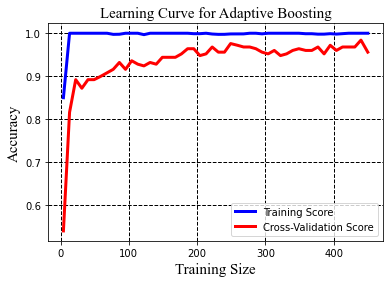

In [49]:
train_sizes,train_scores,test_scores=learning_curve(ada, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Adaptive Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('adaptive.jpg',dpi=300)
plt.show()

# Gradient

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   42.7s finished


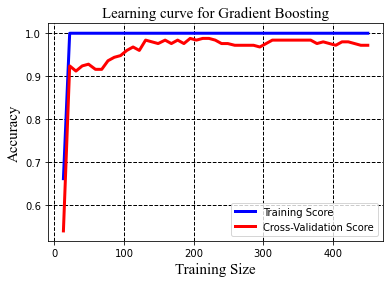

In [50]:
train_sizes,train_scores,test_scores=learning_curve(gdb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('gradient.jpg',dpi=300)
plt.show()

# LGB

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.0s finished


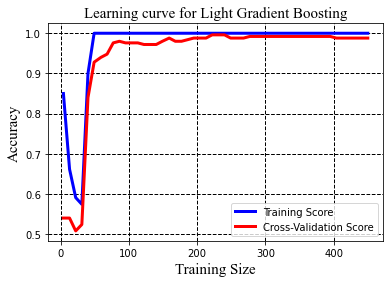

In [51]:
train_sizes,train_scores,test_scores=learning_curve(lgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Light Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Light.jpg',dpi=300)
plt.show()

# Xtreme

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.7s finished


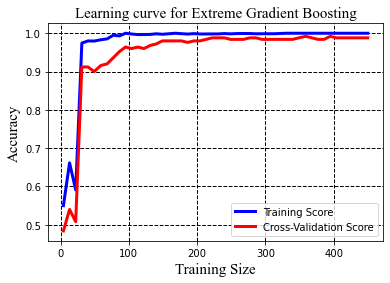

In [52]:
train_sizes,train_scores,test_scores=learning_curve(xgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Xtreme.jpg',dpi=300)
plt.show()

# Stacking

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   36.8s finished


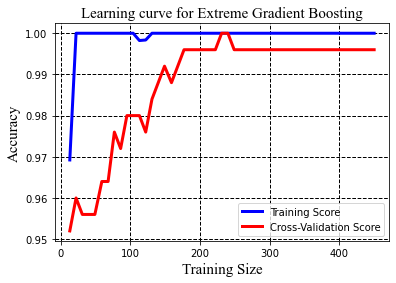

In [62]:
train_sizes,train_scores,test_scores=learning_curve(sc, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('Stacking.jpg',dpi=300)
plt.show()